# Preliminary Report


### Introduction to the SIR Model and Notation

The susceptible-infected-removed (SIR) model is built based on the first-order derivative to model the spread of infectious disease, where the time dependent variables $S$, $I$, $R$ each represent the following populations:

$S$(susceptible): number of individuals who are not infected but could become infected

$I$(infected): number of individuals who are already infected and can spread disease

$R$(removed): number of individuals who are either recovered and immune or have died
    
And $s$, $i$, $r$ are used to represent the proportion of susceptible, infected and removed individuals among the population. 

There are two parameters $b$ and $k$ in the model, where $b$ indicates the number of interactions each day that could spread the disease (per individual) and $k$ indicates the fraction of the infectious population which recovers each day. 

In the ODE-based model, we can get the following system of differential equations, where $t$ is time:

$\frac{ds}{dt} = -b * s(t) * i(t)$

$\frac{dr}{dt} = k * i(t)$

$\frac{di}{dt} = b * s(t) * i(t) - k * i(t)$







### Python Package 'sir'






### Discrete Agent-Based Model

The simulation is done with T values 10, 20 and 30 for both discrete and continuous cases. According to the phase diagrams produced, the following conclusions can be reached:

For the discrete cases, 
the percentage of the population infected and removed mainly depends on b, which is the number of interactions per day per individual(infection rate). 
When the infection rate b is larger than 5, all people will eventually become infected, regardless of k(recovery rate). When the infection rate b is smaller than or equal to 5, if k is large, then only a very small proportion of people will become infected eventually.


Only when b is small and k is relatively large(larger than 0.5), will people not all become infected eventually. Otherwise, all people will eventually become infected.


When k is larger than 0.4,  i, the percentage of the population infected, quickly goes to 0, regardless of infection rate b.



### Continuous/ODE-Based Model

![Figure 1](pictures2/Figure_1odetotalinfectT10.png)



<table><tr>
<td><img src='pictures2/Figure_1odetotalinfectT10.png'></td>
<td><img src='pictures2/Figure_3odetotalinfectT30.png'></td>
<td><img src='pictures2/Figure_2odetotalinfectT20.png'></td>
</tr></table>




### Variations and Improvements




![Figure 1](pictures2/Figure_1odetotalinfectT10.png) | ![Figure 1](pictures2/Figure_2odetotalinfectT20.png)

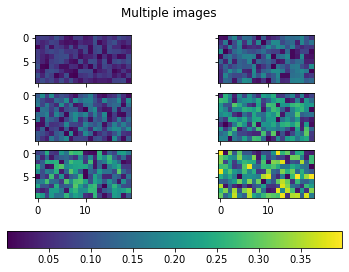

In [4]:

from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(19680801)
Nr = 3
Nc = 2

fig, axs = plt.subplots(Nr, Nc)
fig.suptitle('Multiple images')

images = []
for i in range(Nr):
    for j in range(Nc):
        # Generate data with a range that varies from one plot to the next.
        data = ((1 + i + j) / 10) * np.random.rand(10, 20)
        images.append(axs[i, j].imshow(data))
        axs[i, j].label_outer()

# Find the min and max of all colors for use in setting the color scale.
vmin = min(image.get_array().min() for image in images)
vmax = max(image.get_array().max() for image in images)
norm = colors.Normalize(vmin=vmin, vmax=vmax)
for im in images:
    im.set_norm(norm)

fig.colorbar(images[0], ax=axs, orientation='horizontal', fraction=.1)



In [5]:

# Make images respond to changes in the norm of other images (e.g. via the
# "edit axis, curves and images parameters" GUI on Qt), but be careful not to
# recurse infinitely!
def update(changed_image):
    for im in images:
        if (changed_image.get_cmap() != im.get_cmap()
                or changed_image.get_clim() != im.get_clim()):
            im.set_cmap(changed_image.get_cmap())
            im.set_clim(changed_image.get_clim())


for im in images:
    im.callbacksSM.connect('changed', update)

plt.show()